In [1]:
#loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#loading the cab_data dataset
cab_data = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\Cab_Data.csv')
#checking the shape
print(cab_data.shape)
#getting the first 5 rows
cab_data.head()

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
#loading the city dataset
city = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\City.csv')
#checking the shape
print(city.shape)
#getting the first 5 rows
city.head()

(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
#loading the customer_id dataset
customer_id = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\Customer_ID.csv')
#checking the shape
print(customer_id.shape)
#getting the first 5 rows
customer_id.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
#loading the transaction_id dataset
transaction_id = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\Transaction_ID.csv')
#checking the shape
print(transaction_id.shape)
#getting the first 5 rows
transaction_id.head()

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
#replacing the spaces in the column names with '_'
Dataframes = [cab_data, city, customer_id, transaction_id]
for df in Dataframes:
    df.columns = df.columns.str.replace(' ', '_')

In [7]:
for df in Dataframes:
    print('\n')
    #checking variable types
    print(df.dtypes)
    #checking missing data
    print(df.isna().sum())



Transaction_ID      int64
Date_of_Travel      int64
Company            object
City               object
KM_Travelled      float64
Price_Charged     float64
Cost_of_Trip      float64
dtype: object
Transaction_ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
dtype: int64


City          object
Population    object
Users         object
dtype: object
City          0
Population    0
Users         0
dtype: int64


Customer_ID            int64
Gender                object
Age                    int64
Income_(USD/Month)     int64
dtype: object
Customer_ID           0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64


Transaction_ID     int64
Customer_ID        int64
Payment_Mode      object
dtype: object
Transaction_ID    0
Customer_ID       0
Payment_Mode      0
dtype: int64


In [8]:
#joining cab_data and transcation_id
first_merge = pd.merge(cab_data, transaction_id, how='outer', on=['Transaction_ID'])
print(first_merge.shape)
first_merge.head()

(440098, 9)


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [9]:
first_merge.isna().sum()

Transaction_ID        0
Date_of_Travel    80706
Company           80706
City              80706
KM_Travelled      80706
Price_Charged     80706
Cost_of_Trip      80706
Customer_ID           0
Payment_Mode          0
dtype: int64

In [10]:
#joining customer_id into the merged dataset
second_merge = pd.merge(customer_id, first_merge, how='outer', on=['Customer_ID'])
print(second_merge.shape)
second_merge.head()

(440098, 12)


,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode
0,29290,Male,28,10813,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card
1,29290,Male,28,10813,10351127,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash
2,29290,Male,28,10813,10412921,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card
3,27703,Male,27,9237,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card
4,27703,Male,27,9237,10320494,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card


In [11]:
second_merge.isna().sum()

Customer_ID               0
Gender                    0
Age                       0
Income_(USD/Month)        0
Transaction_ID            0
Date_of_Travel        80706
Company               80706
City                  80706
KM_Travelled          80706
Price_Charged         80706
Cost_of_Trip          80706
Payment_Mode              0
dtype: int64

In [12]:
#joining city to the merged dataframes
master_data = pd.merge(city, second_merge, how='outer', on=['City'])
print(master_data.shape)
master_data.head()

(440099, 14)


,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode
0,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10000139.0,42377.0,Pink Cab,17.85,242.90,198.1350,Cash
1,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10006684.0,42405.0,Yellow Cab,34.34,1099.35,482.1336,Cash
2,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10015798.0,42442.0,Yellow Cab,19.20,559.30,264.9600,Card
3,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10074689.0,42621.0,Yellow Cab,14.84,322.28,179.8608,Card
4,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10078883.0,42631.0,Pink Cab,37.08,728.27,393.0480,Card


In [13]:
master_data.isna().sum()

City                  80706
Population            80706
Users                 80706
Customer_ID               1
Gender                    1
Age                       1
Income_(USD/Month)        1
Transaction_ID            1
Date_of_Travel        80707
Company               80707
KM_Travelled          80707
Price_Charged         80707
Cost_of_Trip          80707
Payment_Mode              1
dtype: int64

In [14]:
#checking for duplicates in the master data
print(master_data.Transaction_ID.unique().shape)
#checking variable types
master_data.dtypes

(440099,)


City                   object
Population             object
Users                  object
Customer_ID           float64
Gender                 object
Age                   float64
Income_(USD/Month)    float64
Transaction_ID        float64
Date_of_Travel        float64
Company                object
KM_Travelled          float64
Price_Charged         float64
Cost_of_Trip          float64
Payment_Mode           object
dtype: object

In [15]:
#dropping rows with missing values
master_data.dropna(axis=0, inplace=True)
master_data.shape

(359392, 14)

In [16]:
#creating a profits column
master_data['Profit'] = master_data['Price_Charged'] - master_data['Cost_of_Trip']
master_data.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Profit
0,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10000139.0,42377.0,Pink Cab,17.85,242.90,198.1350,Cash,44.7650
1,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10006684.0,42405.0,Yellow Cab,34.34,1099.35,482.1336,Cash,617.2164
2,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10015798.0,42442.0,Yellow Cab,19.20,559.30,264.9600,Card,294.3400
3,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10074689.0,42621.0,Yellow Cab,14.84,322.28,179.8608,Card,142.4192
4,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10078883.0,42631.0,Pink Cab,37.08,728.27,393.0480,Card,335.2220


In [17]:
#getting statistical summary of numerical columns
master_data.describe()

,Customer_ID,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,137.253198
std,21012.412463,12.594234,7969.409482,1.268058e+05,307.467197,12.233526,274.378911,157.993661,160.311840
min,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,-220.060000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,28.012000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,81.962000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,190.030000
max,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,1463.966000


In [18]:
#converting from excel time series to python datetime
def convert_excel_time(excel_time):
    '''
    converts excel float format to pandas datetime object
    round to '1min' with 
    .dt.round('1min') to correct floating point conversion innaccuracy
    '''
    
    return pd.to_datetime('1899-12-30') + pd.to_timedelta(excel_time,'D')
master_data['Date_of_Travel'] = convert_excel_time(master_data['Date_of_Travel'])
master_data.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Profit
0,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.1350,Cash,44.7650
1,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10006684.0,2016-02-05,Yellow Cab,34.34,1099.35,482.1336,Cash,617.2164
2,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10015798.0,2016-03-13,Yellow Cab,19.20,559.30,264.9600,Card,294.3400
3,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10074689.0,2016-09-08,Yellow Cab,14.84,322.28,179.8608,Card,142.4192
4,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10078883.0,2016-09-18,Pink Cab,37.08,728.27,393.0480,Card,335.2220


In [19]:
#extracting features from date column
for date_feature in ['year', 'quarter', 'month']:
    master_data[date_feature] = getattr(master_data['Date_of_Travel'].dt, date_feature)
master_data.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,Profit,year,quarter,month
0,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.1350,Cash,44.7650,2016,1,1
1,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10006684.0,2016-02-05,Yellow Cab,34.34,1099.35,482.1336,Cash,617.2164,2016,1,2
2,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10015798.0,2016-03-13,Yellow Cab,19.20,559.30,264.9600,Card,294.3400,2016,1,3
3,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10074689.0,2016-09-08,Yellow Cab,14.84,322.28,179.8608,Card,142.4192,2016,3,9
4,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10078883.0,2016-09-18,Pink Cab,37.08,728.27,393.0480,Card,335.2220,2016,3,9


In [20]:
#converting the variable types for date columns
date_cols = ['year', 'quarter', 'month']
for col in date_cols:
    master_data[col] = master_data[col].astype('category')
master_data[date_cols].dtypes

year       category
quarter    category
month      category
dtype: object

In [21]:
#getting the list for numerical and categorical columns
num_cols = ['Age', 'Income_(USD/Month)', 'KM_Travelled', 'Price_Charged', 'Cost_of_Trip', 'Profit']
cat_cols = ['City', 'Gender', 'Company', 'Payment_Mode','year', 'quarter', 'month']

In [22]:
# getting value counts for each categorical column
def count_value(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())
count_value(master_data, cat_cols)


For column City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

For column Gender
Male      205912
Female    153480
Name: Gender, dtype: int64

For column Company
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

For column Payment_Mode
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

For column year
2017    128510
2018    123563
2016    107319
Name: year, dtype: int64

For column quarter
4    130559
3     95858
2     69848
1     63127
Name: quarter, dtype: int64

For column month
12    47007
11    42700
10    40852
9     3

year


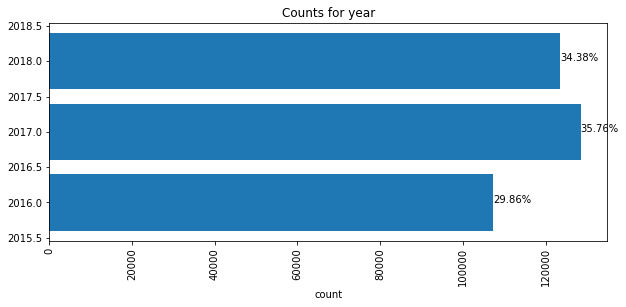

quarter


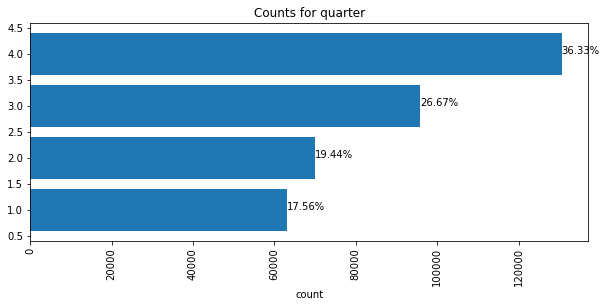

month


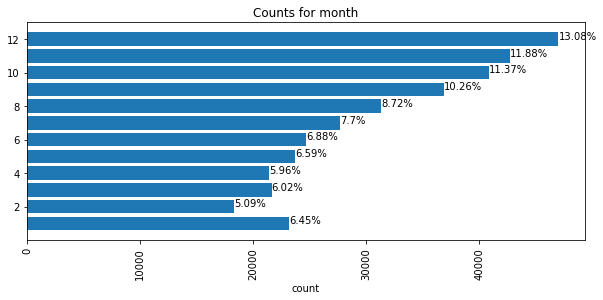

In [23]:
# checking value counts for extracted columns
def plot_datecols(x, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        print(col)
        counts = df[['dummy', col]].groupby([col], as_index = False).count()
        fig, ax = plt.subplots(figsize = (10,4))
        graph = plt.barh(counts[col], counts.dummy) #creating a graph
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col)
        plt.xlabel('count')
        #getting percentages
        total = counts['dummy'].sum()
        percentage = []
        for i in range(counts.shape[0]):
            pct = (counts.dummy[i]/total)*100
            percentage.append(round(pct, 2))
        counts['Percentage'] = percentage
        # plotting the graph with percentages
        i = 0
        for p in graph:
            pct = f'{percentage[i]}%'
            width1, height1 =p.get_width(),p.get_height()
            x1 =p.get_x()+width1
            y1=p.get_y()+height1/2
            ax.annotate(pct,(x1,y1))
            i+=1
        plt.show()
plot_datecols(date_cols, master_data)

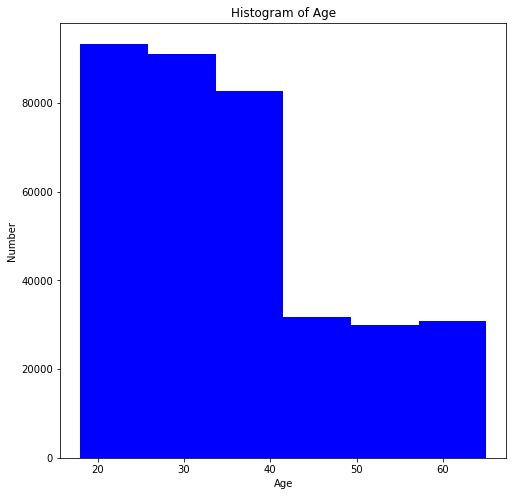

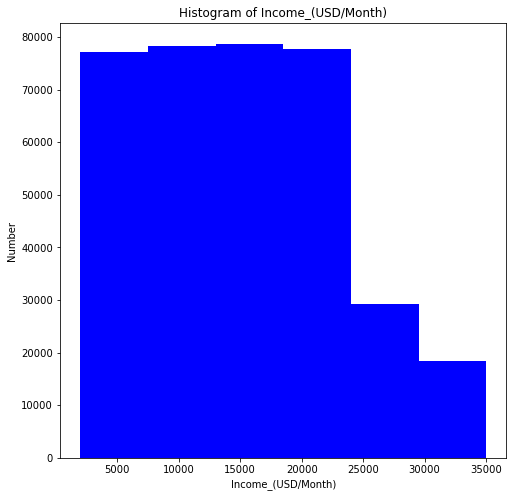

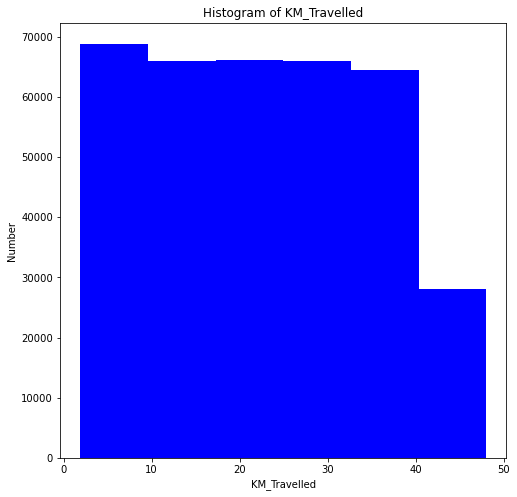

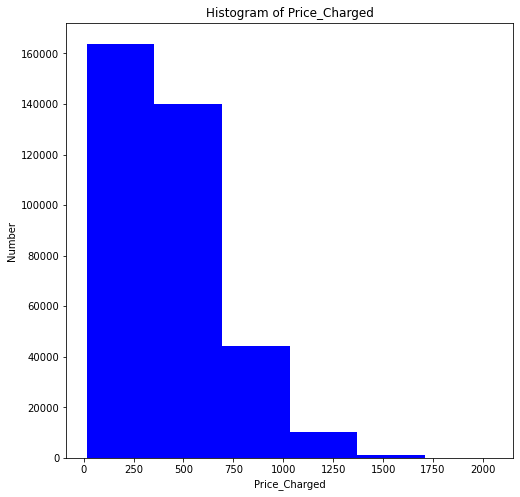

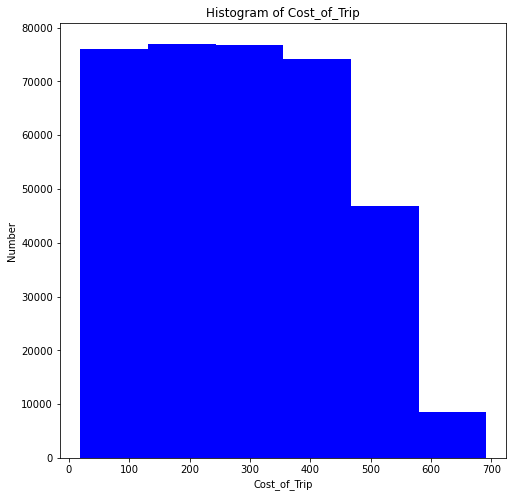

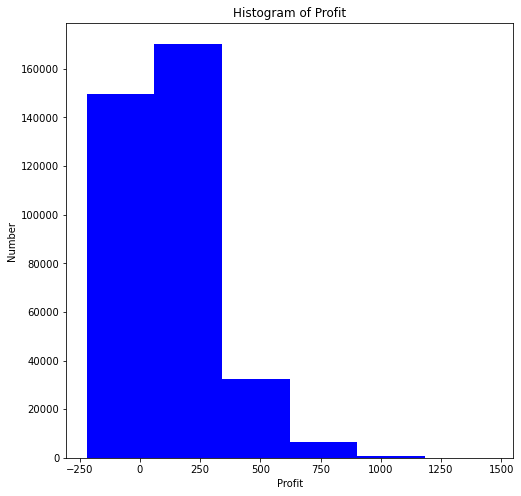

In [24]:
# plotting a histogram for numerical columns
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(8,8))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
plot_histogram(master_data, num_cols)

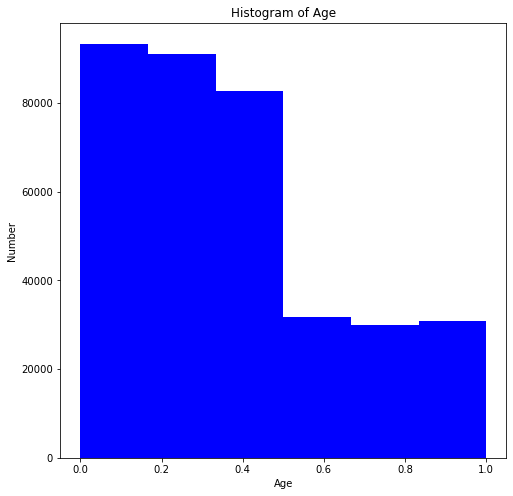

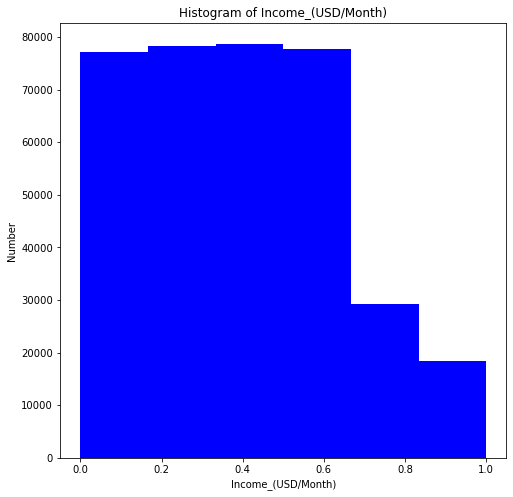

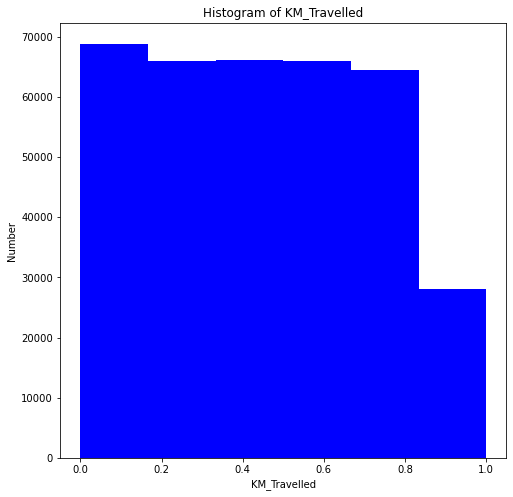

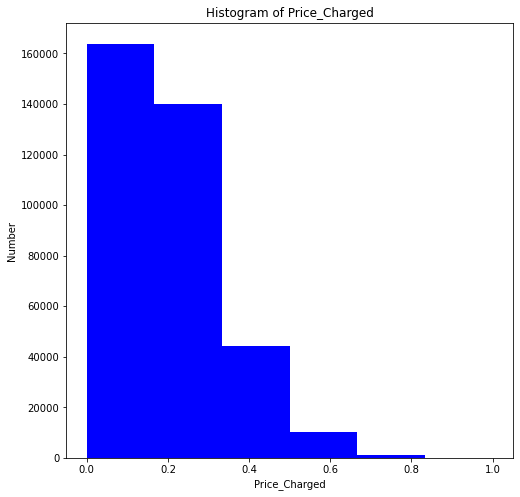

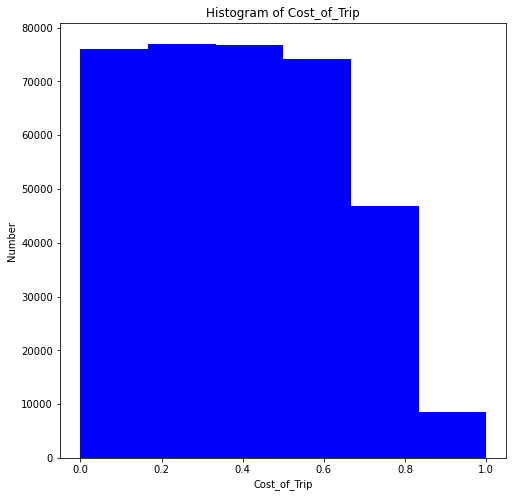

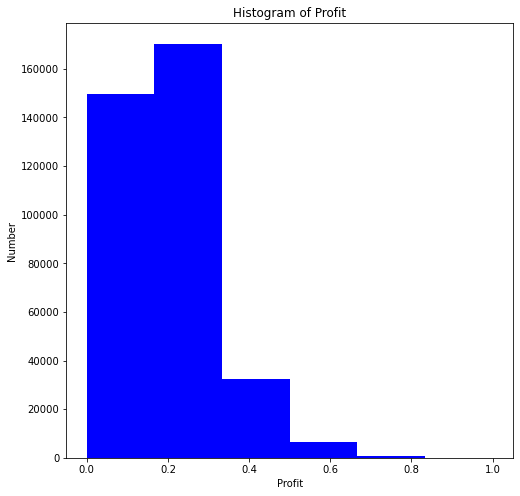

In [25]:
# scaling the numerical features
# min-max scale the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1 = master_data[num_cols]
x1[num_cols] = scaler.fit_transform(x1[num_cols])
#plotting histogram of transformed columns
plot_histogram(x1, num_cols)

City


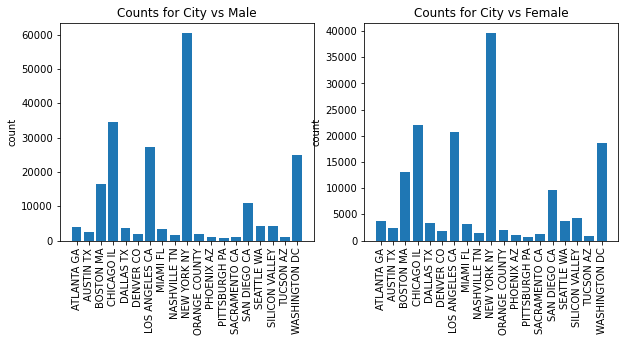

City


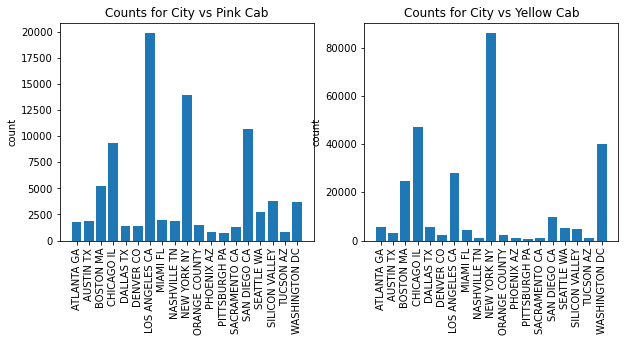

City


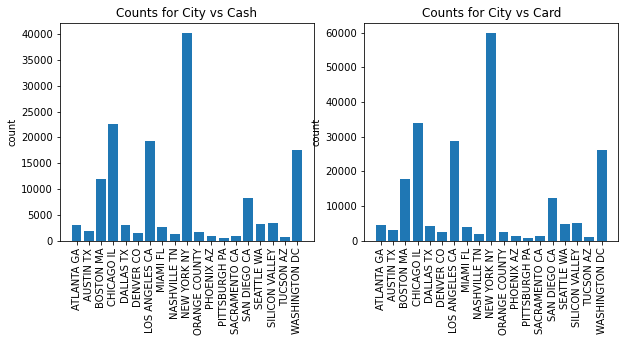

pass


Gender


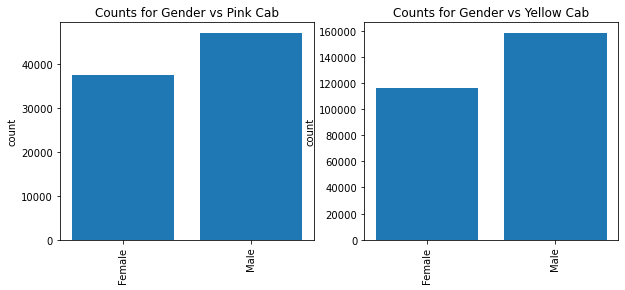

Gender


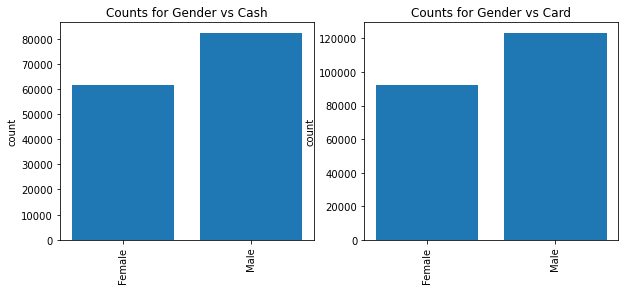

Company


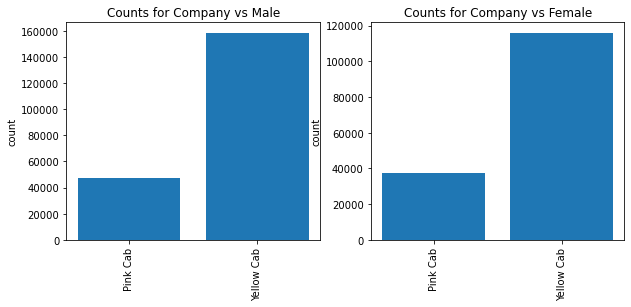

pass


Company


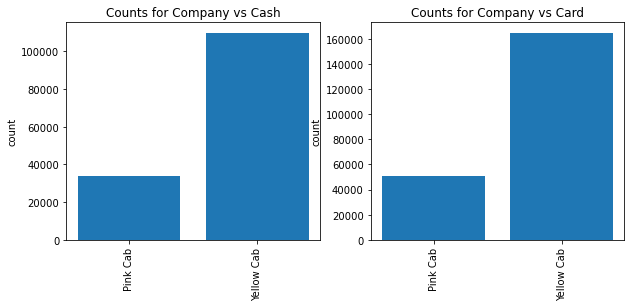

Payment_Mode


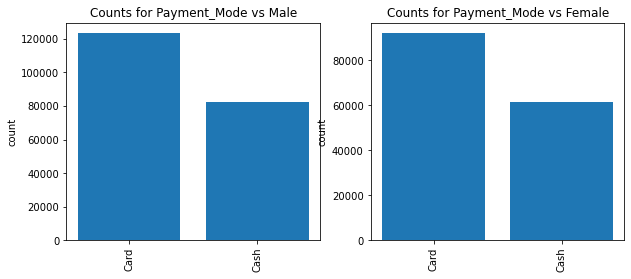

Payment_Mode


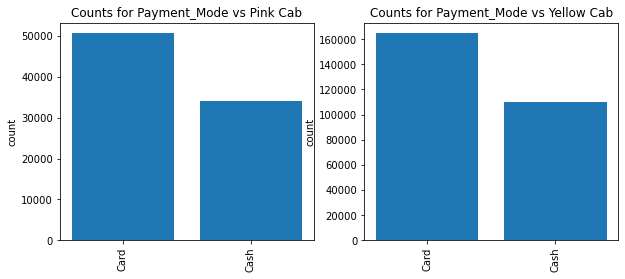

pass


year


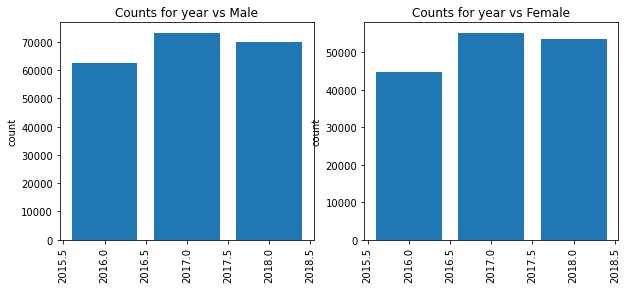

year


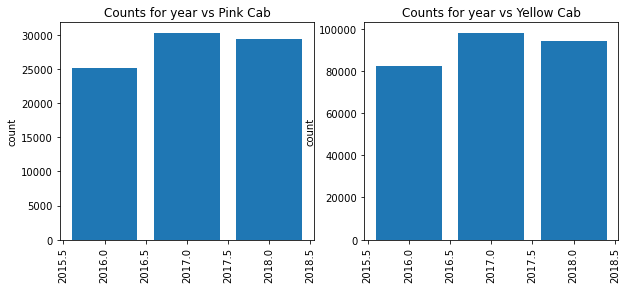

year


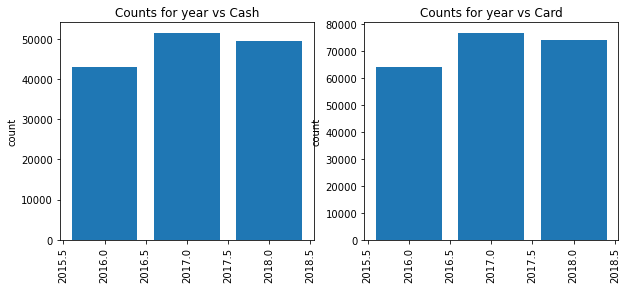

quarter


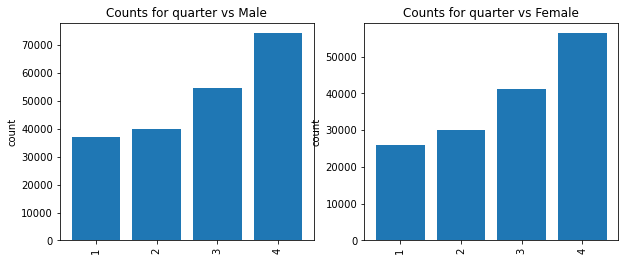

quarter


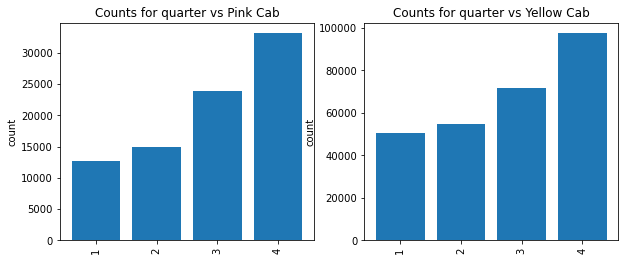

quarter


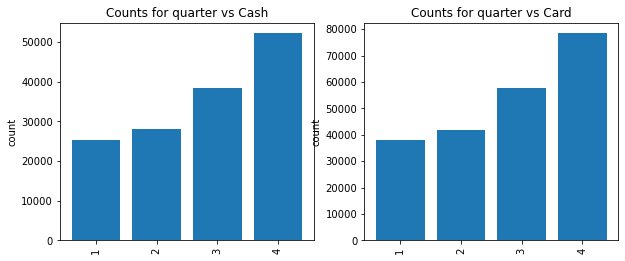

month


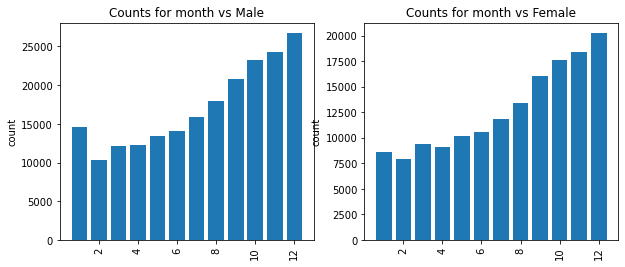

month


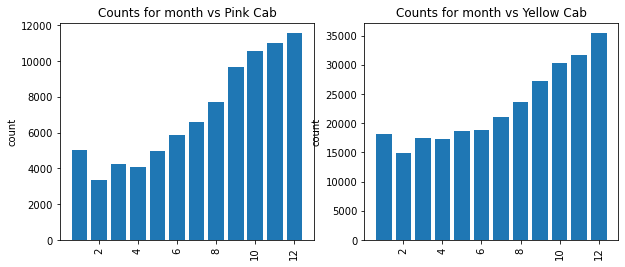

month


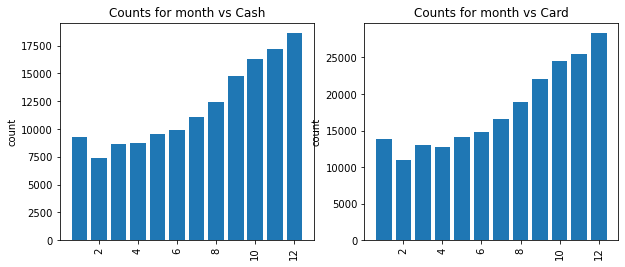

In [26]:
#bar plots for categorical columns against categorical columns
def plot_cols(x,y, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        for target_col in y:
            if target_col != col:
                print(col)
                counts = df[['dummy', col, target_col]].groupby([target_col, col], as_index = False).count()
                _ = plt.subplots(figsize = (10,4))
                #plotting first graph
                ax = plt.subplot(1, 2, 1)
                temp_0 = counts[counts[target_col] == master_data[target_col].unique()[0]][[col, 'dummy']]
                graph = plt.bar(temp_0[col], temp_0.dummy) #creating a graph
                plt.xticks(rotation=90)
                plt.title('Counts for ' + col + ' vs ' + master_data[target_col].unique()[0])
                plt.ylabel('count')
                #plotting second graph
                ax1 = plt.subplot(1, 2, 2)
                temp_1 = counts[counts[target_col] == master_data[target_col].unique()[1]][[col, 'dummy']]
                graph1 = plt.bar(temp_1[col], temp_1.dummy)
                plt.xticks(rotation=90)
                plt.title('Counts for ' + col +' vs ' + master_data[target_col].unique()[1] )
                plt.ylabel('count')
                plt.show()
            else:
                print('pass')
                print('\n')
target_cols = ['Gender', 'Company', 'Payment_Mode']
plot_cols(cat_cols, target_cols, master_data)



For Age vs City


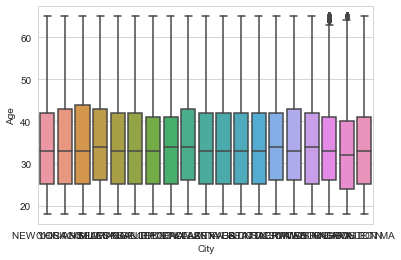



For Age vs Gender


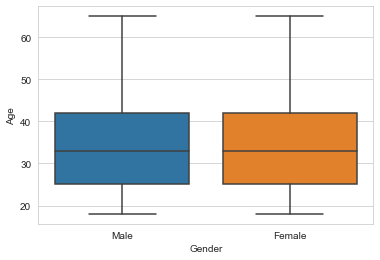



For Age vs Company


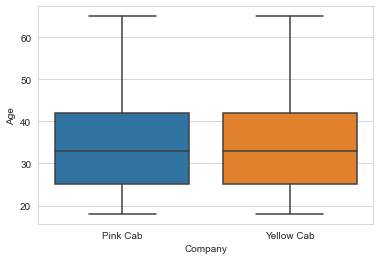



For Age vs Payment_Mode


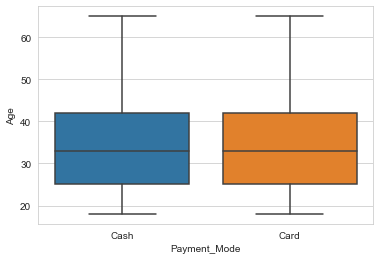



For Age vs year


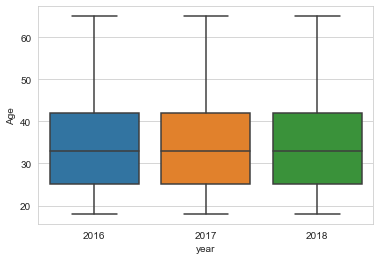



For Age vs quarter


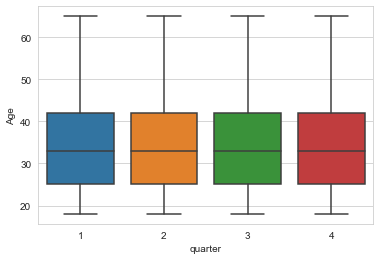



For Age vs month


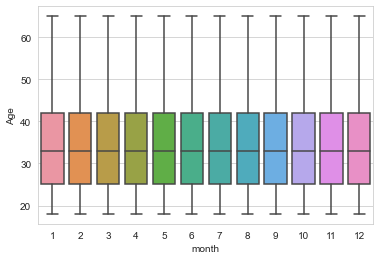



For Income_(USD/Month) vs City


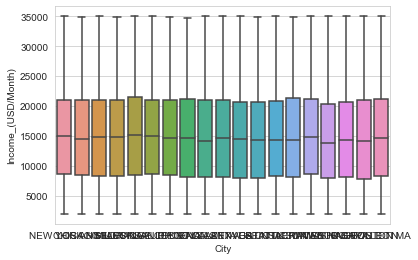



For Income_(USD/Month) vs Gender


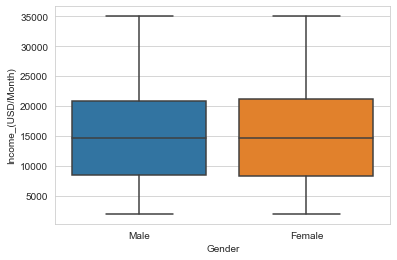



For Income_(USD/Month) vs Company


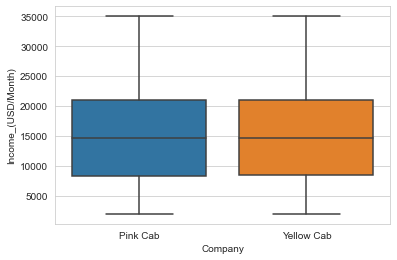



For Income_(USD/Month) vs Payment_Mode


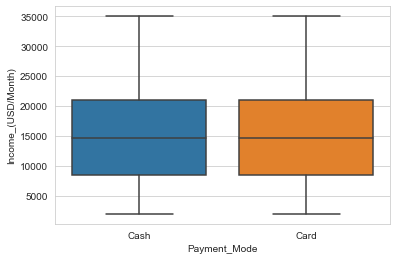



For Income_(USD/Month) vs year


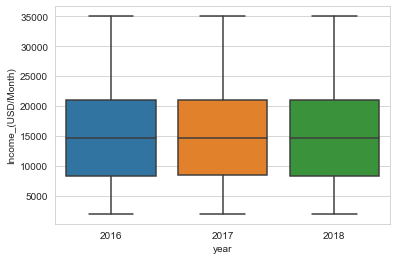



For Income_(USD/Month) vs quarter


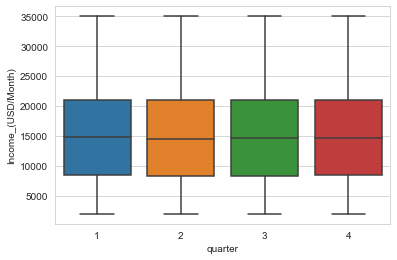



For Income_(USD/Month) vs month


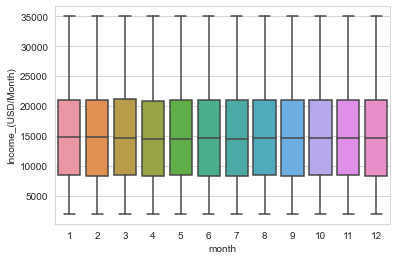



For KM_Travelled vs City


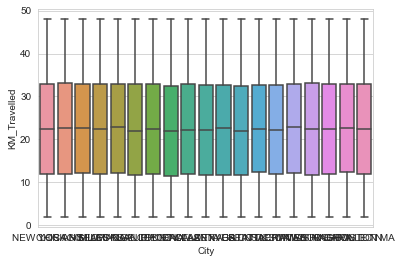



For KM_Travelled vs Gender


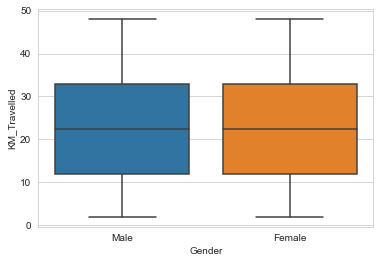



For KM_Travelled vs Company


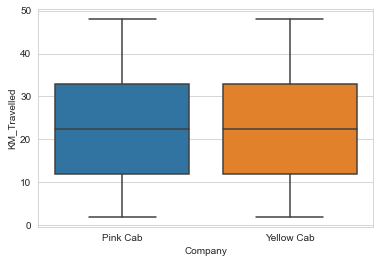



For KM_Travelled vs Payment_Mode


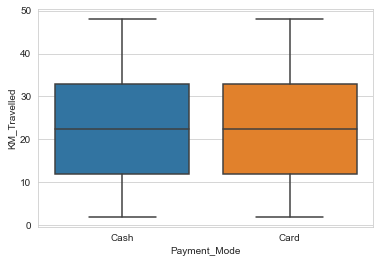



For KM_Travelled vs year


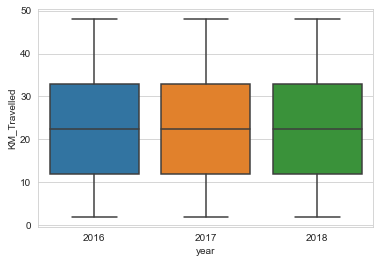



For KM_Travelled vs quarter


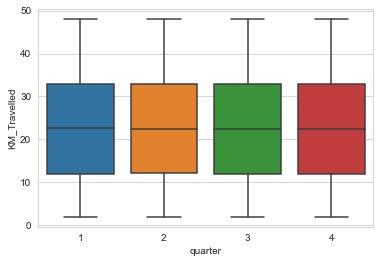



For KM_Travelled vs month


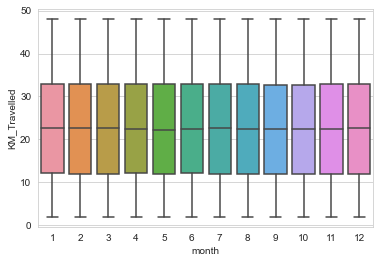



For Price_Charged vs City


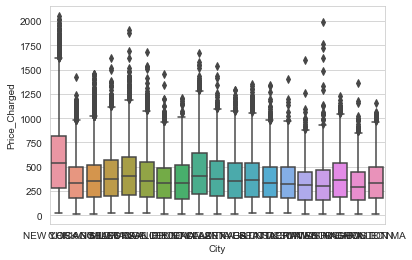



For Price_Charged vs Gender


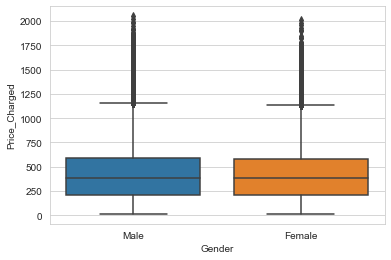



For Price_Charged vs Company


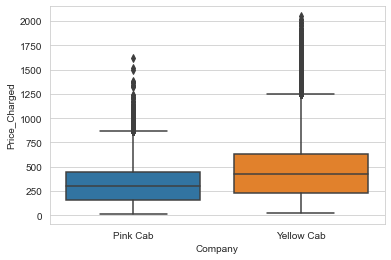



For Price_Charged vs Payment_Mode


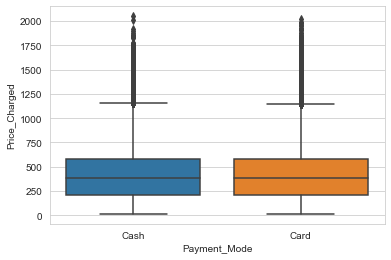



For Price_Charged vs year


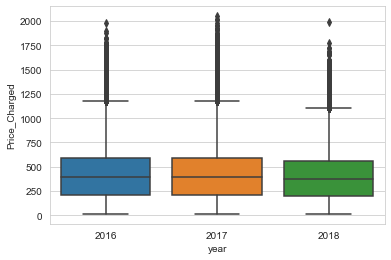



For Price_Charged vs quarter


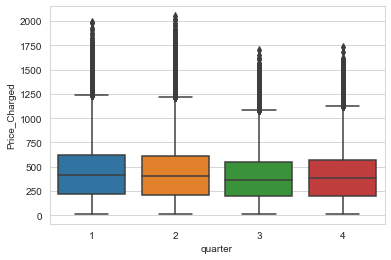



For Price_Charged vs month


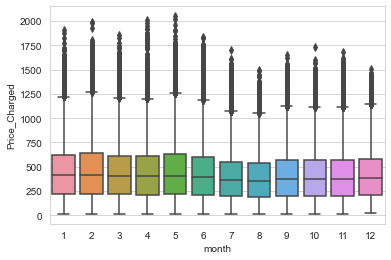



For Cost_of_Trip vs City


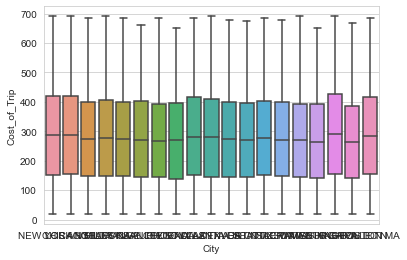



For Cost_of_Trip vs Gender


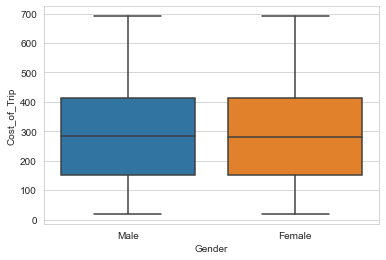



For Cost_of_Trip vs Company


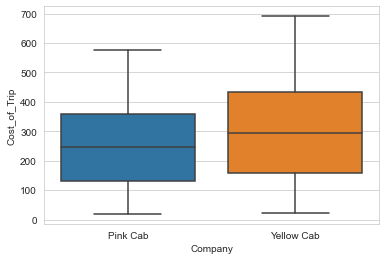



For Cost_of_Trip vs Payment_Mode


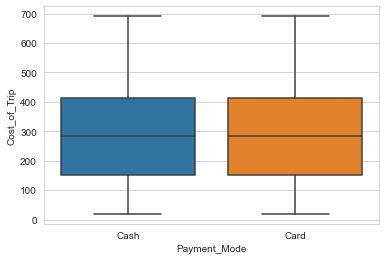



For Cost_of_Trip vs year


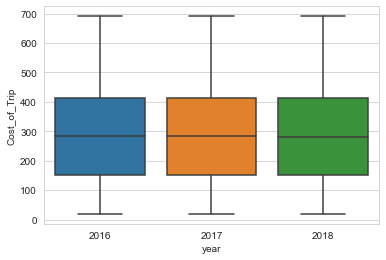



For Cost_of_Trip vs quarter


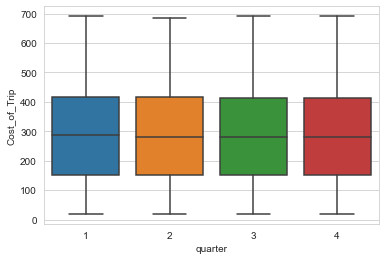



For Cost_of_Trip vs month


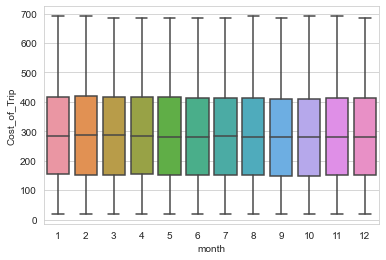



For Profit vs City


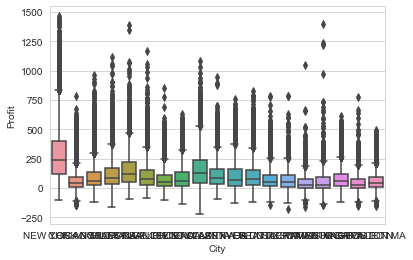



For Profit vs Gender


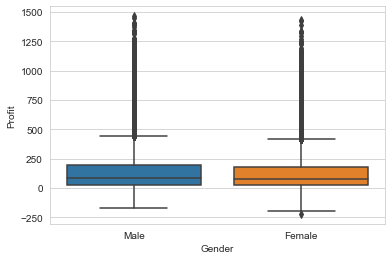



For Profit vs Company


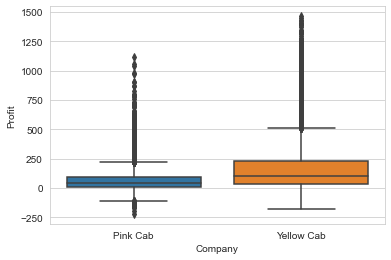



For Profit vs Payment_Mode


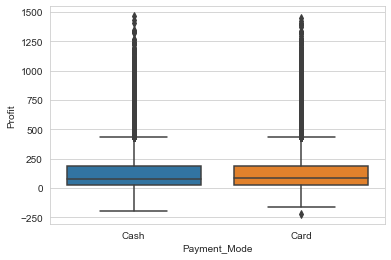



For Profit vs year


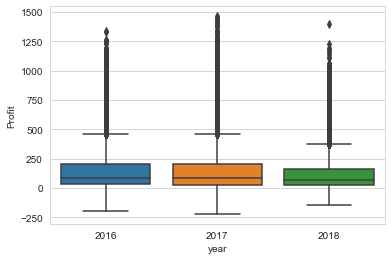



For Profit vs quarter


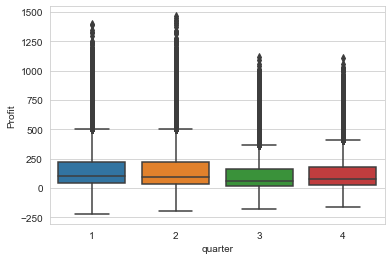



For Profit vs month


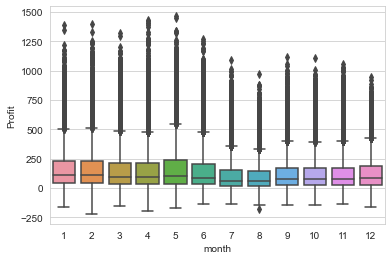

In [27]:
#visualize categorical separation by numerical features
def box_plot(df, num_cols, cat_cols):
    for num_col in num_cols:
        for cat_col in cat_cols:
            print('\n')
            print('For '+ num_col + ' vs ' + cat_col)
            sns.set_style("whitegrid")
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.xlabel(cat_col) # Set text for the x axis
            plt.ylabel(num_col)# Set text for y axis
            plt.show()
box_plot(master_data, num_cols, cat_cols)

Profit
     Profit         City  year   Company
0    44.765  NEW YORK NY  2016  Pink Cab
4   335.222  NEW YORK NY  2016  Pink Cab
22    2.825  NEW YORK NY  2018  Pink Cab
30  151.680  NEW YORK NY  2016  Pink Cab
32   13.592  NEW YORK NY  2016  Pink Cab


For Profit vs City


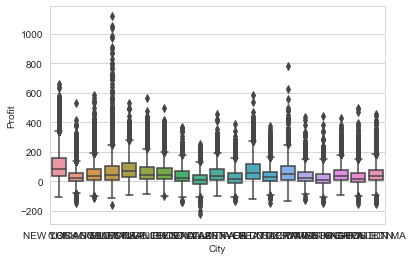

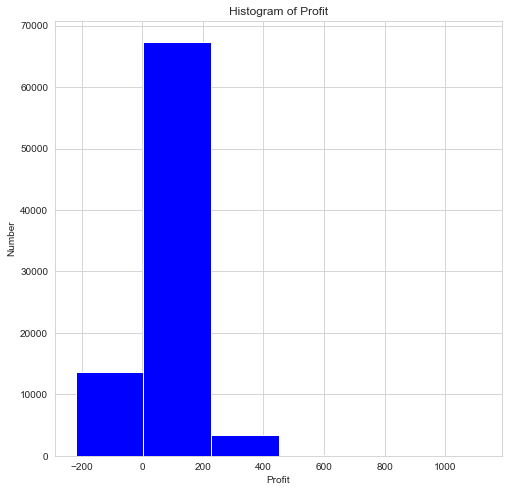

             Profit
count  84711.000000
mean      62.652174
std       77.590378
min     -220.060000
25%       11.206000
50%       41.500000
75%       93.965000
max     1119.480000
     Profit         City  year     Company
1  617.2164  NEW YORK NY  2016  Yellow Cab
2  294.3400  NEW YORK NY  2016  Yellow Cab
3  142.4192  NEW YORK NY  2016  Yellow Cab
5  542.1064  NEW YORK NY  2016  Yellow Cab
6  318.7024  NEW YORK NY  2017  Yellow Cab


For Profit vs City


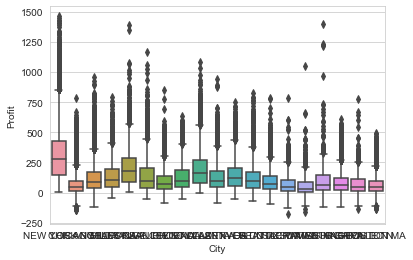

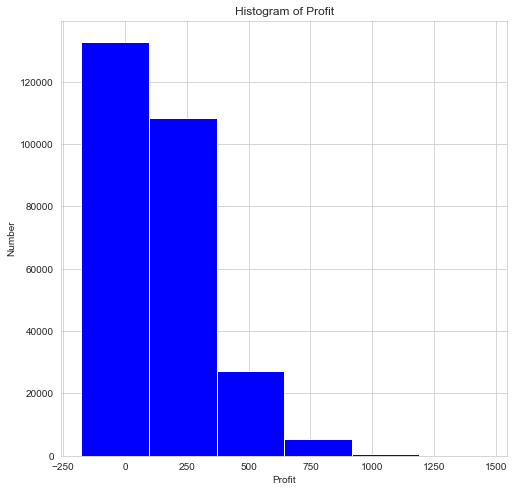

              Profit
count  274681.000000
mean      160.259986
std       171.823833
min      -176.930800
25%        37.180000
50%       102.000000
75%       228.670400
max      1463.966000
Price_Charged
    Price_Charged         City  year   Company
0          242.90  NEW YORK NY  2016  Pink Cab
4          728.27  NEW YORK NY  2016  Pink Cab
22          53.81  NEW YORK NY  2018  Pink Cab
30         407.21  NEW YORK NY  2016  Pink Cab
32          36.62  NEW YORK NY  2016  Pink Cab


For Price_Charged vs City


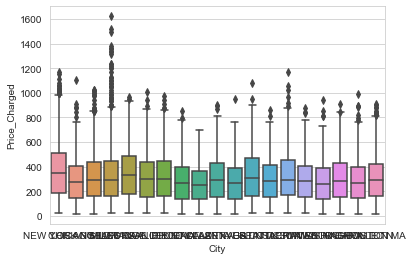

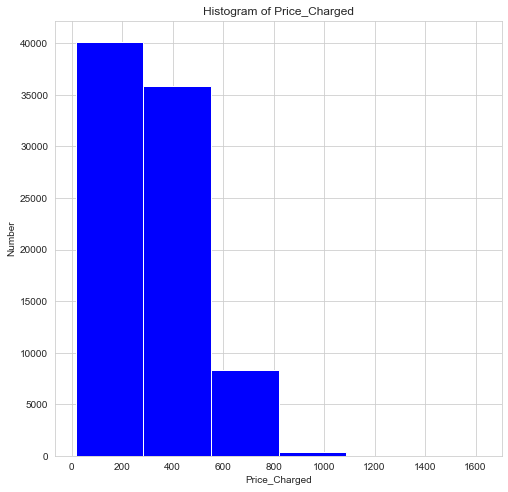

       Price_Charged
count   84711.000000
mean      310.800856
std       181.995661
min        15.600000
25%       159.970000
50%       298.060000
75%       441.505000
max      1623.480000
   Price_Charged         City  year     Company
1        1099.35  NEW YORK NY  2016  Yellow Cab
2         559.30  NEW YORK NY  2016  Yellow Cab
3         322.28  NEW YORK NY  2016  Yellow Cab
5         981.40  NEW YORK NY  2016  Yellow Cab
6         574.60  NEW YORK NY  2017  Yellow Cab


For Price_Charged vs City


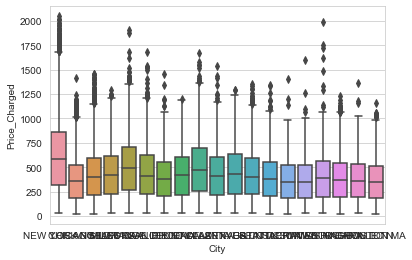

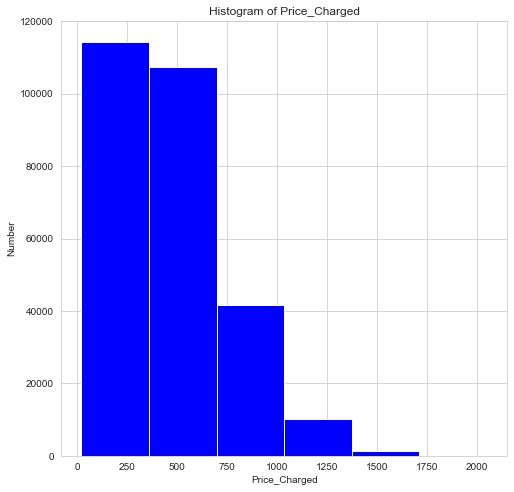

       Price_Charged
count  274681.000000
mean      458.181990
std       288.386166
min        20.730000
25%       226.680000
50%       425.060000
75%       633.880000
max      2048.030000
Cost_of_Trip
    Cost_of_Trip         City  year   Company
0        198.135  NEW YORK NY  2016  Pink Cab
4        393.048  NEW YORK NY  2016  Pink Cab
22        50.985  NEW YORK NY  2018  Pink Cab
30       255.530  NEW YORK NY  2016  Pink Cab
32        23.028  NEW YORK NY  2016  Pink Cab


For Cost_of_Trip vs City


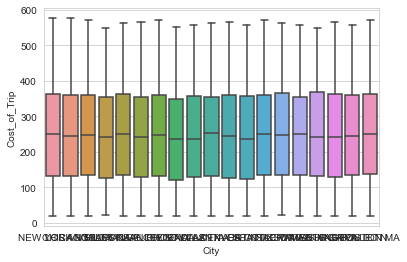

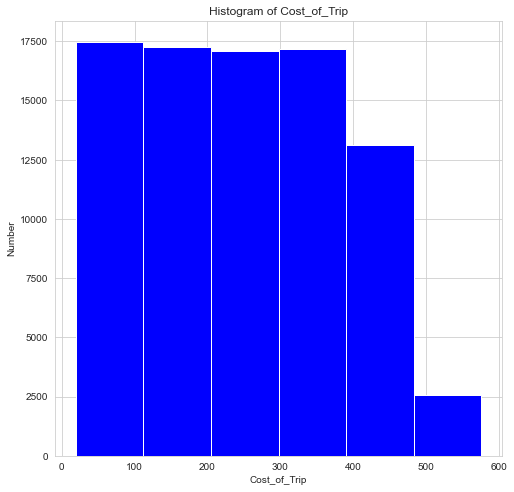

       Cost_of_Trip
count  84711.000000
mean     248.148682
std      135.403345
min       19.000000
25%      131.868000
50%      246.330000
75%      360.180000
max      576.000000
   Cost_of_Trip         City  year     Company
1      482.1336  NEW YORK NY  2016  Yellow Cab
2      264.9600  NEW YORK NY  2016  Yellow Cab
3      179.8608  NEW YORK NY  2016  Yellow Cab
5      439.2936  NEW YORK NY  2016  Yellow Cab
6      255.8976  NEW YORK NY  2017  Yellow Cab


For Cost_of_Trip vs City


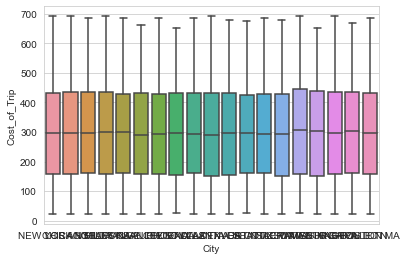

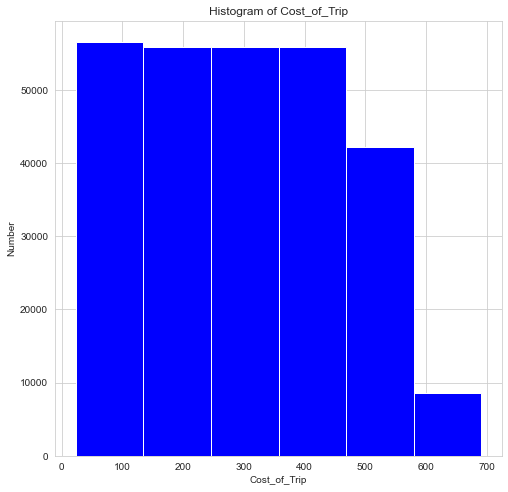

        Cost_of_Trip
count  274681.000000
mean      297.922004
std       162.548986
min        22.800000
25%       158.400000
50%       295.596000
75%       432.432000
max       691.200000


In [28]:
#creating a function for profit, price charged and cost of trip by company
def by_company(col, x='City', y='Company'):
    df = master_data[[col, 'City', 'year','Company']]#creating a dataframe
    df = df.groupby(['Company'])#grouping by company
    df1 = df.get_group('Pink Cab')#getting dataframe of just pink cab
    df2 = df.get_group('Yellow Cab')#getting dataframe of just yellow cab
    sets = [df1, df2]
    for df in sets:
        print(df.head())
        box_plot(df, [col], ['City'])#box_plot of col vs city of each dataframe
        plot_histogram(df, [col])
        print(df.describe())#summary of profits of each dataframe
cols = ['Profit', 'Price_Charged', 'Cost_of_Trip'] 
for col in cols:
    print(col)
    by_company(col)

Profit
     Profit         City  year   Company
0    44.765  NEW YORK NY  2016  Pink Cab
4   335.222  NEW YORK NY  2016  Pink Cab
30  151.680  NEW YORK NY  2016  Pink Cab
32   13.592  NEW YORK NY  2016  Pink Cab
35  257.872  NEW YORK NY  2016  Pink Cab


For Profit vs City


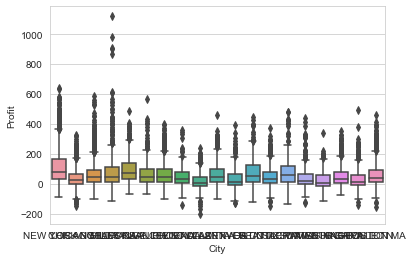

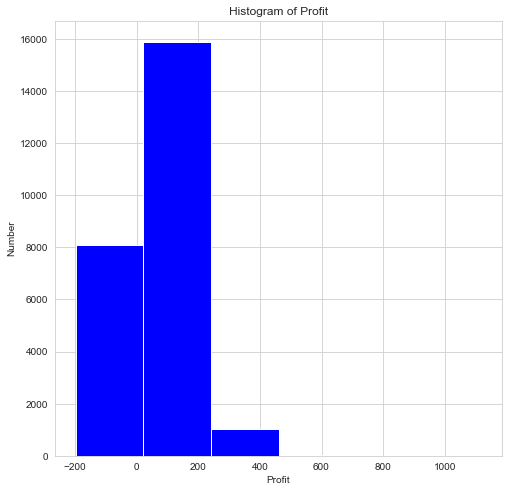

             Profit
count  25080.000000
mean      68.321819
std       82.691391
min     -198.698000
25%       13.047500
50%       46.092000
75%      103.670000
max     1119.480000
      Profit         City  year     Company
1   617.2164  NEW YORK NY  2016  Yellow Cab
2   294.3400  NEW YORK NY  2016  Yellow Cab
3   142.4192  NEW YORK NY  2016  Yellow Cab
5   542.1064  NEW YORK NY  2016  Yellow Cab
31  410.4272  NEW YORK NY  2016  Yellow Cab


For Profit vs City


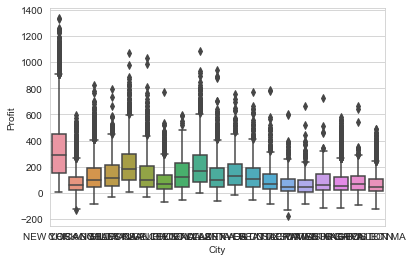

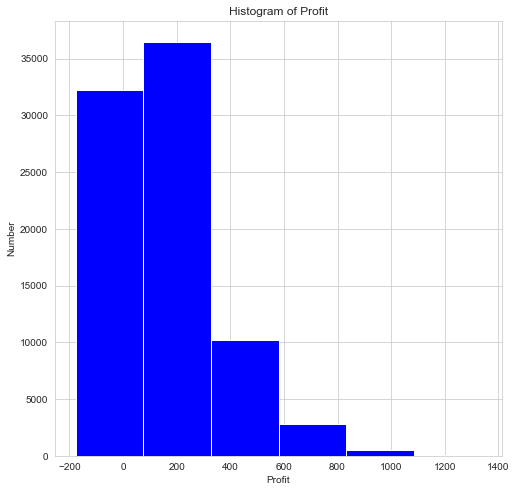

             Profit
count  82239.000000
mean     169.347821
std      179.315043
min     -176.930800
25%       40.214000
50%      109.636800
75%      240.484600
max     1336.870000
      Profit         City  year   Company
47    31.548  NEW YORK NY  2017  Pink Cab
53    71.870  NEW YORK NY  2017  Pink Cab
59   305.452  NEW YORK NY  2017  Pink Cab
80    30.390  NEW YORK NY  2017  Pink Cab
106   72.034  NEW YORK NY  2017  Pink Cab


For Profit vs City


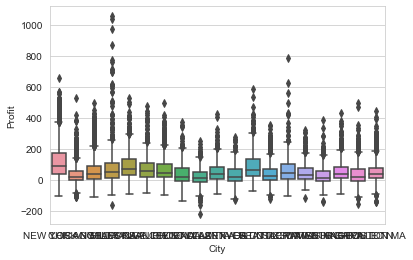

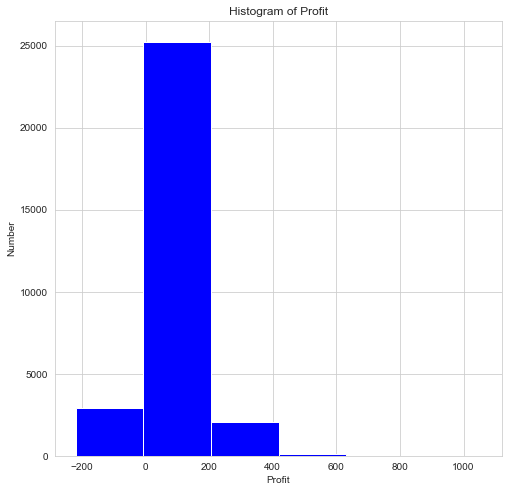

             Profit
count  30321.000000
mean      67.070839
std       84.074658
min     -220.060000
25%       10.958000
50%       44.180000
75%      102.122000
max     1056.110000
      Profit         City  year     Company
6   318.7024  NEW YORK NY  2017  Yellow Cab
7    72.8588  NEW YORK NY  2017  Yellow Cab
8   148.8892  NEW YORK NY  2017  Yellow Cab
9   630.5040  NEW YORK NY  2017  Yellow Cab
10  409.4632  NEW YORK NY  2017  Yellow Cab


For Profit vs City


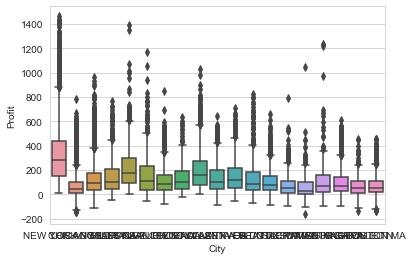

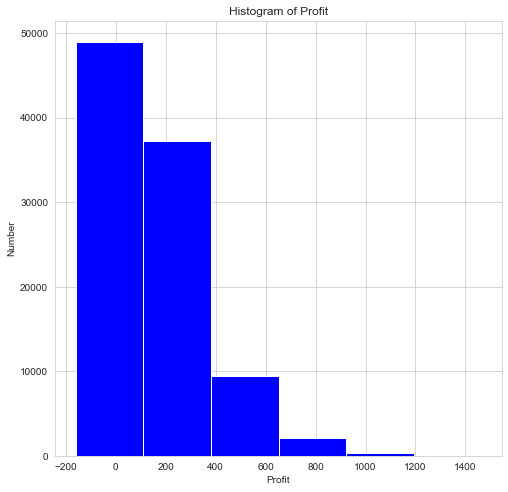

             Profit
count  98189.000000
mean     168.817057
std      178.842771
min     -160.714000
25%       40.430000
50%      110.434000
75%      241.034000
max     1463.966000
      Profit         City  year   Company
22     2.825  NEW YORK NY  2018  Pink Cab
151  135.664  NEW YORK NY  2018  Pink Cab
157   44.200  NEW YORK NY  2018  Pink Cab
159   47.304  NEW YORK NY  2018  Pink Cab
206  158.315  NEW YORK NY  2018  Pink Cab


For Profit vs City


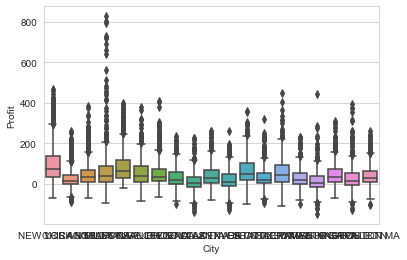

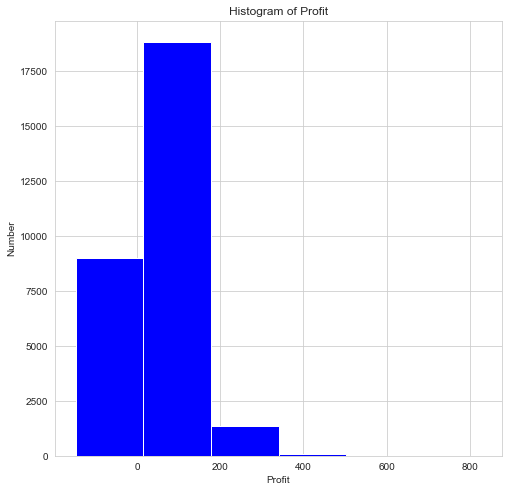

             Profit
count  29310.000000
mean      53.229689
std       64.032374
min     -147.477000
25%       10.246500
50%       35.939000
75%       79.788750
max      827.540000
      Profit         City  year     Company
18  137.9388  NEW YORK NY  2018  Yellow Cab
19  501.2460  NEW YORK NY  2018  Yellow Cab
20  343.7652  NEW YORK NY  2018  Yellow Cab
21  321.9312  NEW YORK NY  2018  Yellow Cab
23  497.6000  NEW YORK NY  2018  Yellow Cab


For Profit vs City


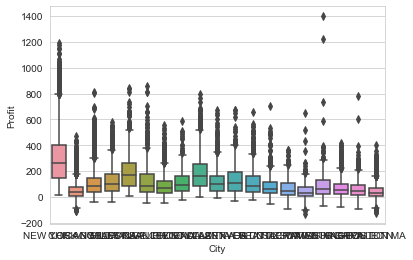

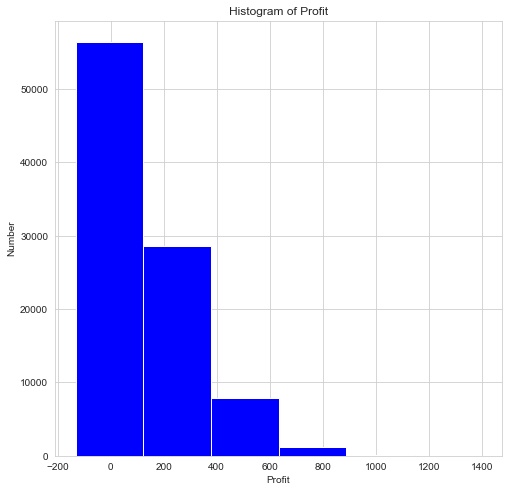

             Profit
count  94253.000000
mean     143.416122
std      155.668692
min     -132.528000
25%       32.034400
50%       87.945200
75%      204.990000
max     1399.110000
Price_Charged
    Price_Charged         City  year   Company
0          242.90  NEW YORK NY  2016  Pink Cab
4          728.27  NEW YORK NY  2016  Pink Cab
30         407.21  NEW YORK NY  2016  Pink Cab
32          36.62  NEW YORK NY  2016  Pink Cab
35         598.68  NEW YORK NY  2016  Pink Cab


For Price_Charged vs City


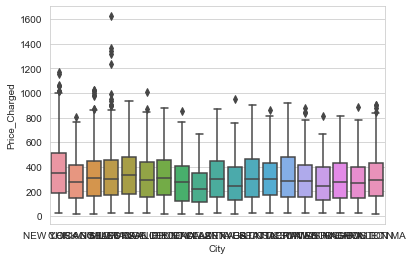

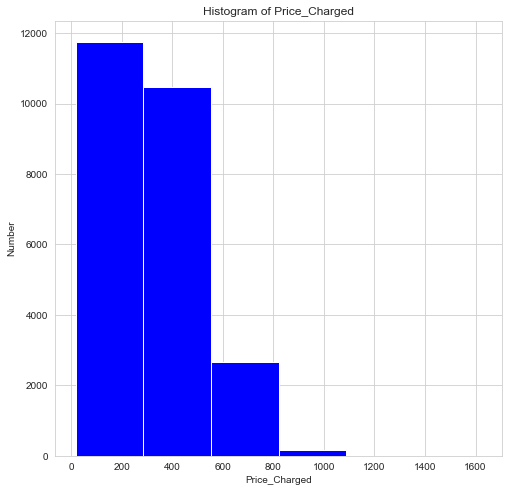

       Price_Charged
count   25080.000000
mean      315.330113
std       186.778878
min        16.380000
25%       161.160000
50%       301.700000
75%       447.840000
max      1623.480000
    Price_Charged         City  year     Company
1         1099.35  NEW YORK NY  2016  Yellow Cab
2          559.30  NEW YORK NY  2016  Yellow Cab
3          322.28  NEW YORK NY  2016  Yellow Cab
5          981.40  NEW YORK NY  2016  Yellow Cab
31         774.92  NEW YORK NY  2016  Yellow Cab


For Price_Charged vs City


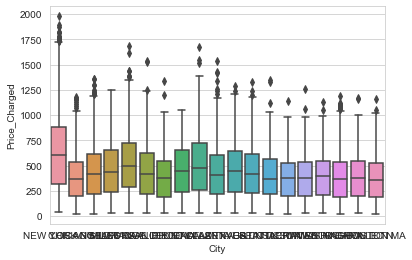

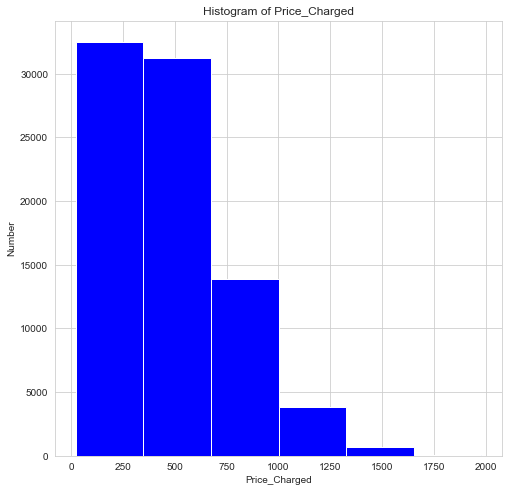

       Price_Charged
count   82239.000000
mean      467.918301
std       295.373603
min        22.000000
25%       231.810000
50%       432.690000
75%       646.820000
max      1978.790000
     Price_Charged         City  year   Company
47          194.62  NEW YORK NY  2017  Pink Cab
53          238.19  NEW YORK NY  2017  Pink Cab
59          743.82  NEW YORK NY  2017  Pink Cab
80          183.39  NEW YORK NY  2017  Pink Cab
106         411.49  NEW YORK NY  2017  Pink Cab


For Price_Charged vs City


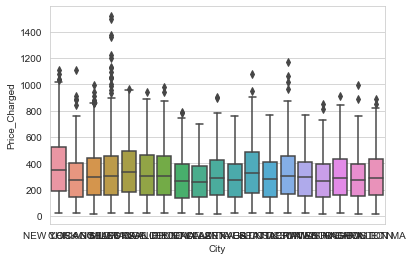

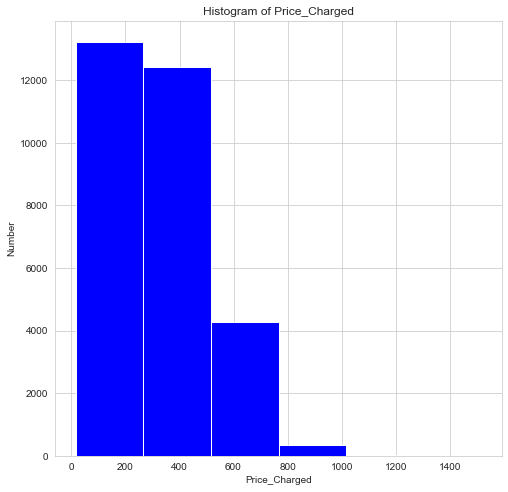

       Price_Charged
count   30321.000000
mean      315.907442
std       186.756069
min        15.600000
25%       161.720000
50%       300.590000
75%       447.090000
max      1517.150000
    Price_Charged         City  year     Company
6          574.60  NEW YORK NY  2017  Yellow Cab
7          111.35  NEW YORK NY  2017  Yellow Cab
8          454.09  NEW YORK NY  2017  Yellow Cab
9         1088.25  NEW YORK NY  2017  Yellow Cab
10         926.02  NEW YORK NY  2017  Yellow Cab


For Price_Charged vs City


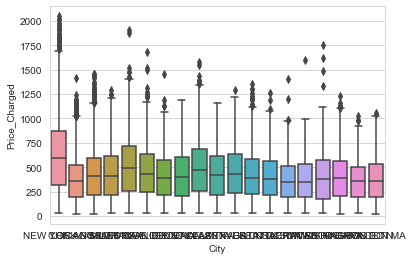

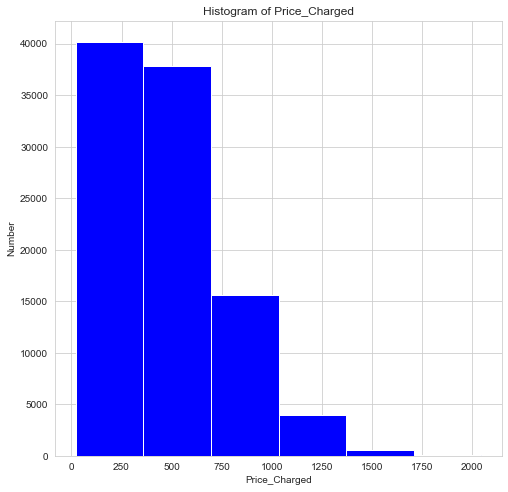

       Price_Charged
count   98189.000000
mean      466.639950
std       295.302062
min        20.730000
25%       229.990000
50%       431.950000
75%       646.930000
max      2048.030000
     Price_Charged         City  year   Company
22           53.81  NEW YORK NY  2018  Pink Cab
151         519.28  NEW YORK NY  2018  Pink Cab
157         406.45  NEW YORK NY  2018  Pink Cab
159         177.84  NEW YORK NY  2018  Pink Cab
206         637.43  NEW YORK NY  2018  Pink Cab


For Price_Charged vs City


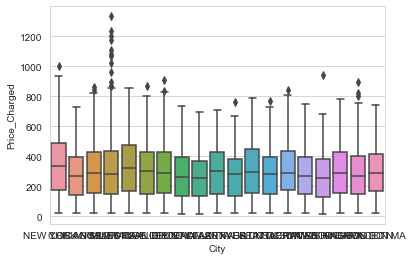

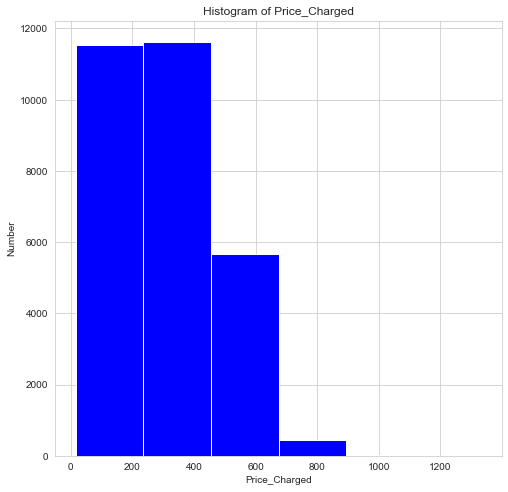

       Price_Charged
count   29310.000000
mean      301.642530
std       172.252605
min        15.750000
25%       157.340000
50%       292.480000
75%       431.070000
max      1332.980000
    Price_Charged         City  year     Company
18         309.99  NEW YORK NY  2018  Yellow Cab
19         955.35  NEW YORK NY  2018  Yellow Cab
20         659.73  NEW YORK NY  2018  Yellow Cab
21         597.72  NEW YORK NY  2018  Yellow Cab
23        1067.84  NEW YORK NY  2018  Yellow Cab


For Price_Charged vs City


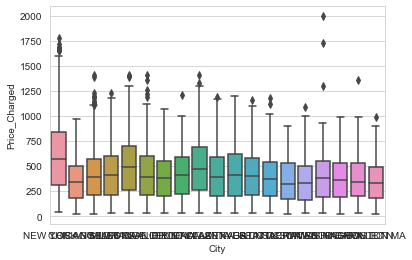

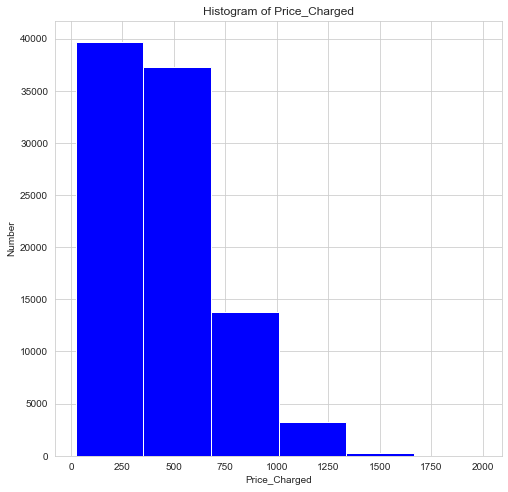

       Price_Charged
count   94253.000000
mean      440.875558
std       273.764934
min        22.420000
25%       219.740000
50%       411.620000
75%       611.470000
max      1993.830000
Cost_of_Trip
    Cost_of_Trip         City  year   Company
0        198.135  NEW YORK NY  2016  Pink Cab
4        393.048  NEW YORK NY  2016  Pink Cab
30       255.530  NEW YORK NY  2016  Pink Cab
32        23.028  NEW YORK NY  2016  Pink Cab
35       340.808  NEW YORK NY  2016  Pink Cab


For Cost_of_Trip vs City


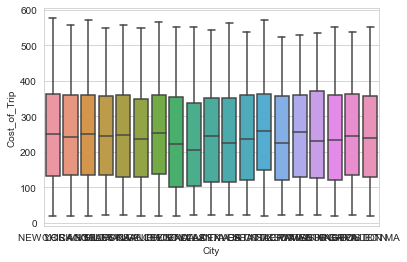

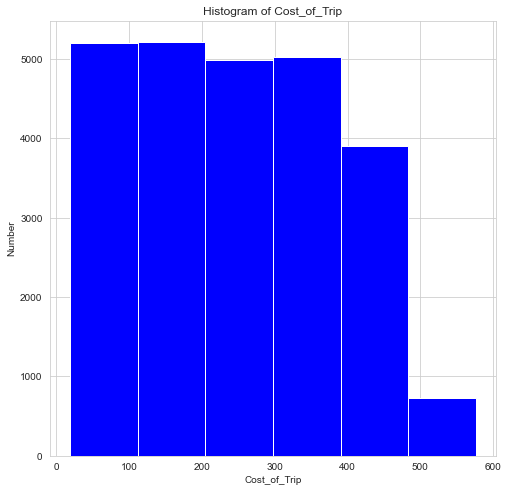

       Cost_of_Trip
count  25080.000000
mean     247.008294
std      135.404597
min       19.000000
25%      130.896000
50%      244.419000
75%      359.856000
max      576.000000
    Cost_of_Trip         City  year     Company
1       482.1336  NEW YORK NY  2016  Yellow Cab
2       264.9600  NEW YORK NY  2016  Yellow Cab
3       179.8608  NEW YORK NY  2016  Yellow Cab
5       439.2936  NEW YORK NY  2016  Yellow Cab
31      364.4928  NEW YORK NY  2016  Yellow Cab


For Cost_of_Trip vs City


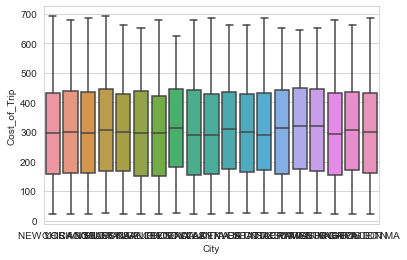

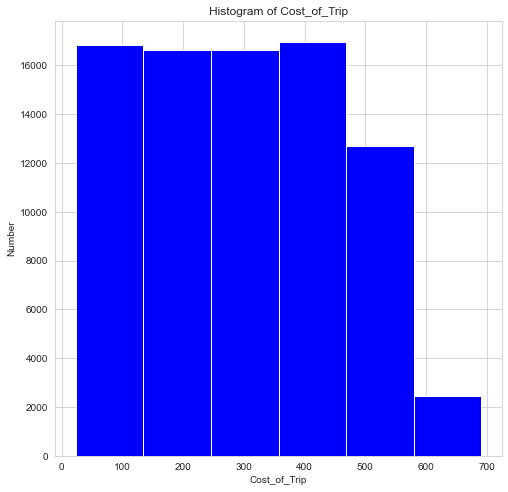

       Cost_of_Trip
count  82239.000000
mean     298.570481
std      162.345428
min       22.800000
25%      158.875200
50%      296.654400
75%      432.684000
max      691.200000
     Cost_of_Trip         City  year   Company
47        163.072  NEW YORK NY  2017  Pink Cab
53        166.320  NEW YORK NY  2017  Pink Cab
59        438.368  NEW YORK NY  2017  Pink Cab
80        153.000  NEW YORK NY  2017  Pink Cab
106       339.456  NEW YORK NY  2017  Pink Cab


For Cost_of_Trip vs City


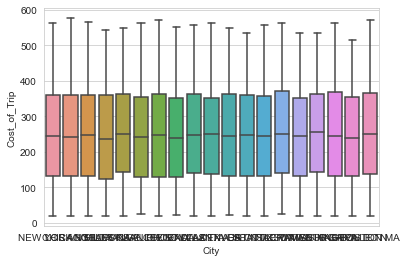

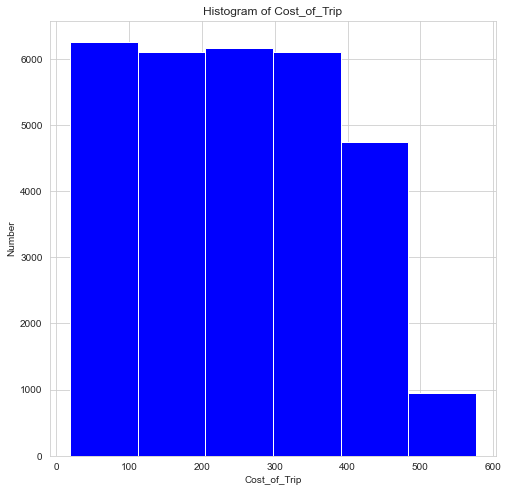

       Cost_of_Trip
count  30321.000000
mean     248.836603
std      135.631975
min       19.190000
25%      132.000000
50%      246.376000
75%      360.809000
max      576.000000
    Cost_of_Trip         City  year     Company
6       255.8976  NEW YORK NY  2017  Yellow Cab
7        38.4912  NEW YORK NY  2017  Yellow Cab
8       305.2008  NEW YORK NY  2017  Yellow Cab
9       457.7460  NEW YORK NY  2017  Yellow Cab
10      516.5568  NEW YORK NY  2017  Yellow Cab


For Cost_of_Trip vs City


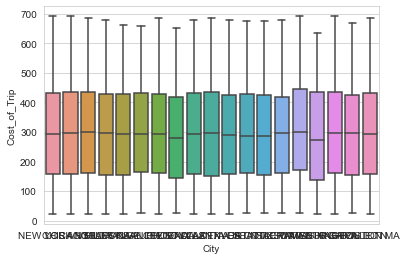

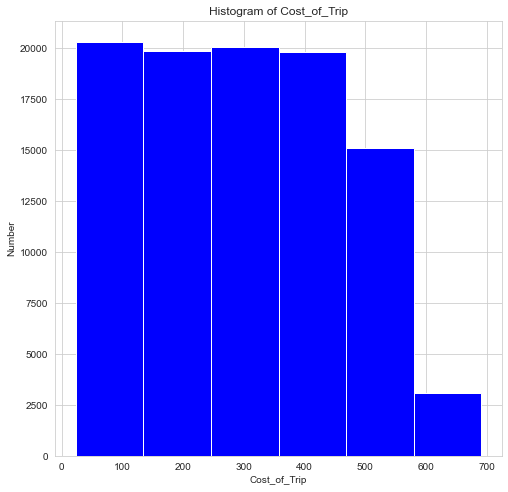

       Cost_of_Trip
count  98189.000000
mean     297.822893
std      162.688554
min       22.800000
25%      158.188800
50%      295.488000
75%      432.352800
max      691.200000
     Cost_of_Trip         City  year   Company
22         50.985  NEW YORK NY  2018  Pink Cab
151       383.616  NEW YORK NY  2018  Pink Cab
157       362.250  NEW YORK NY  2018  Pink Cab
159       130.536  NEW YORK NY  2018  Pink Cab
206       479.115  NEW YORK NY  2018  Pink Cab


For Cost_of_Trip vs City


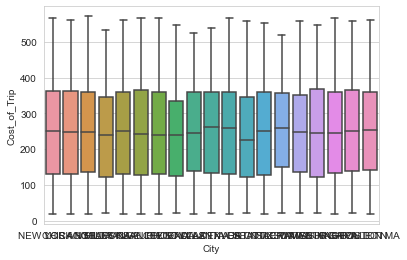

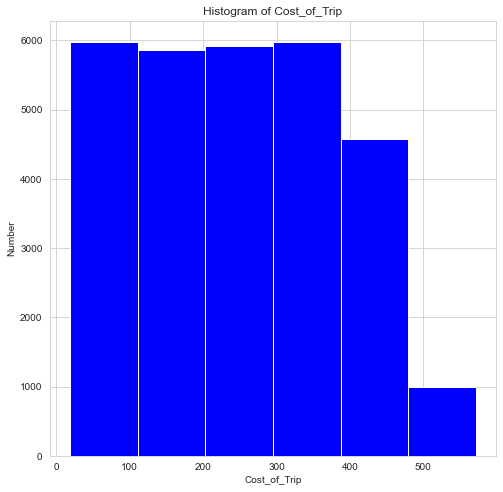

       Cost_of_Trip
count  29310.000000
mean     248.412841
std      135.163790
min       19.000000
25%      132.561000
50%      247.212000
75%      360.013500
max      571.200000
    Cost_of_Trip         City  year     Company
18      172.0512  NEW YORK NY  2018  Yellow Cab
19      454.1040  NEW YORK NY  2018  Yellow Cab
20      315.9648  NEW YORK NY  2018  Yellow Cab
21      275.7888  NEW YORK NY  2018  Yellow Cab
23      570.2400  NEW YORK NY  2018  Yellow Cab


For Cost_of_Trip vs City


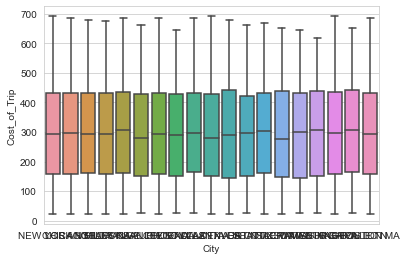

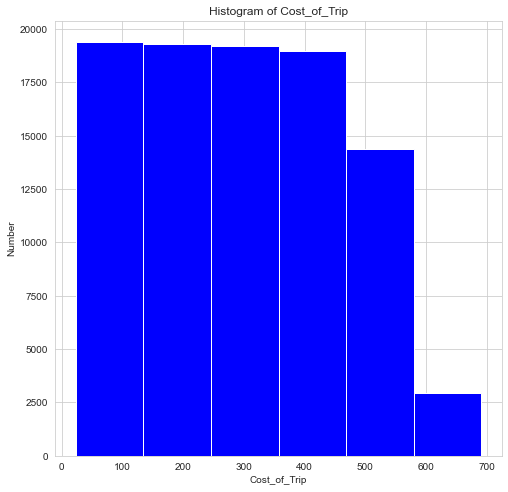

       Cost_of_Trip
count  94253.000000
mean     297.459436
std      162.580930
min       22.800000
25%      158.004000
50%      293.910000
75%      432.216000
max      691.200000


In [29]:
#creating a function for profit, price charged and cost of trip by company
def by_company(col, x='City', y='Company'):
    df = master_data[[col, 'City', 'year','Company']]#creating a dataframe
    df = df.groupby(['Company', 'year'])#grouping by company
    df_p16 = df.get_group(('Pink Cab', 2016))#getting dataframe of  pink cab in 2016
    df_y16 = df.get_group(('Yellow Cab', 2016))
    df_p17 = df.get_group(('Pink Cab', 2017))
    df_y17 = df.get_group(('Yellow Cab', 2017))
    df_p18 = df.get_group(('Pink Cab', 2018))
    df_y18 = df.get_group(('Yellow Cab', 2018))
    sets = [df_p16, df_y16,df_p17,df_y17,df_p18,df_y18 ]
    for df in sets:
        print(df.head())
        box_plot(df, [col], ['City'])#box_plot of profit vs city of each dataframe
        plot_histogram(df, [col])
        print(df.describe())#summary of profits of each dataframe
cols = ['Profit', 'Price_Charged', 'Cost_of_Trip'] 
for col in cols:
    print(col)
    by_company(col)

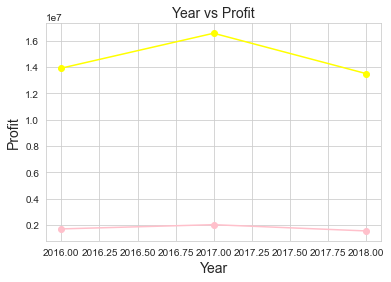

In [30]:
#grouping df1 and df2 by year
def line_plot_data(col, dcol='year'):
    df = master_data[[col, 'City', 'year','quarter','Company']]#creating a dataframe
    df = df.groupby(['Company',dcol])#grouping by company
    df_p16 = df.get_group(('Pink Cab', 2016))#getting dataframe of  pink cab in 2016
    df_y16 = df.get_group(('Yellow Cab', 2016))
    df_p17 = df.get_group(('Pink Cab', 2017))
    df_y17 = df.get_group(('Yellow Cab', 2017))
    df_p18 = df.get_group(('Pink Cab', 2018))
    df_y18 = df.get_group(('Yellow Cab', 2018))
    p2016 = df_p16[col].sum()
    y2016 = df_y16[col].sum()
    p2017 = df_p17[col].sum()
    y2017 = df_y17[col].sum()
    p2018 = df_p18[col].sum()
    y2018 = df_y18[col].sum()
    Data_p = {'Year': [2016, 2017, 2018],
              col: [p2016, p2017, p2018]}
    df_p = pd.DataFrame(Data_p,columns=['Year',col])
    Data_y = {'Year': [2016, 2017, 2018],
              col: [y2016, y2017, y2018]}
    df_y = pd.DataFrame(Data_y,columns=['Year',col])
    plt.plot(df_p['Year'], df_p[col], color='pink', marker='o')
    plt.plot(df_y['Year'], df_y[col], color='yellow', marker='o')
    plt.title('Year vs '+ col, fontsize=14)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.grid(True)
    plt.show()
line_plot_data('Profit')

In [32]:
# creating a correlation matrix
# get correlations
corr = master_data[num_cols].corr()
corr

,Age,Income_(USD/Month),KM_Travelled,Price_Charged,Cost_of_Trip,Profit
Age,1.000000,0.003907,-0.000369,-0.003084,-0.000189,-0.005093
Income_(USD/Month),0.003907,1.000000,-0.000544,0.003228,-0.000633,0.006148
KM_Travelled,-0.000369,-0.000544,1.000000,0.835753,0.981848,0.462768
Price_Charged,-0.003084,0.003228,0.835753,1.000000,0.859812,0.864154
Cost_of_Trip,-0.000189,-0.000633,0.981848,0.859812,1.000000,0.486056
Profit,-0.005093,0.006148,0.462768,0.864154,0.486056,1.000000


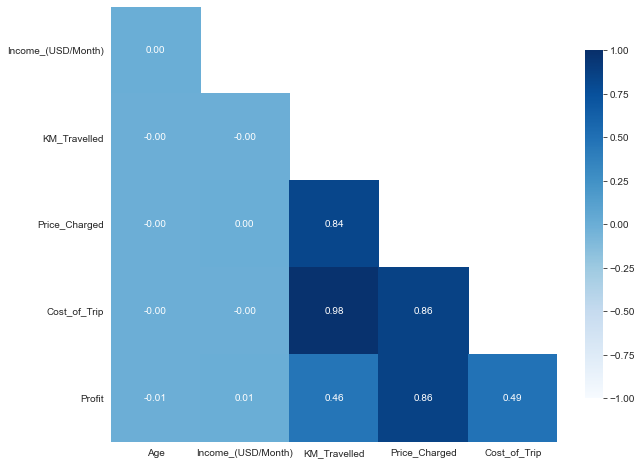

In [33]:
#creating a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# adjusting mask and df
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
# plotting heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

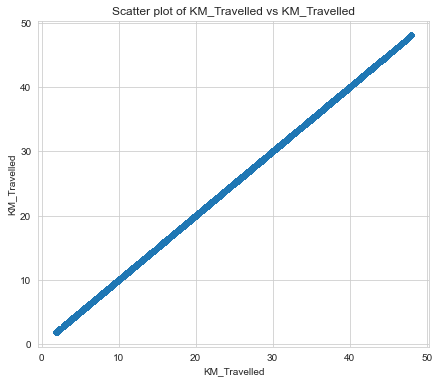

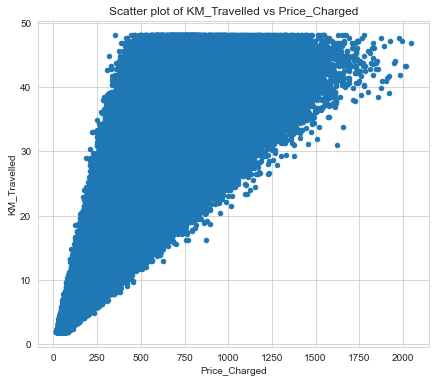

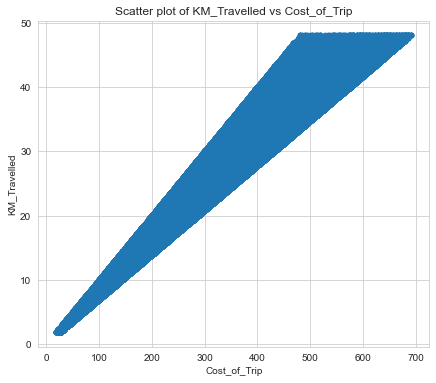

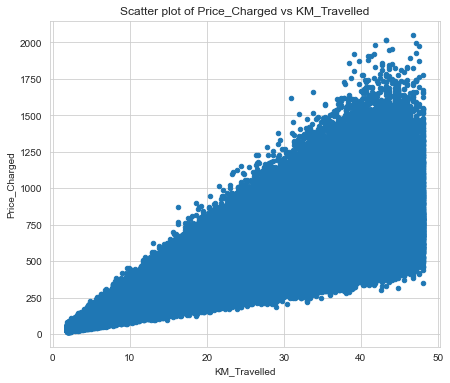

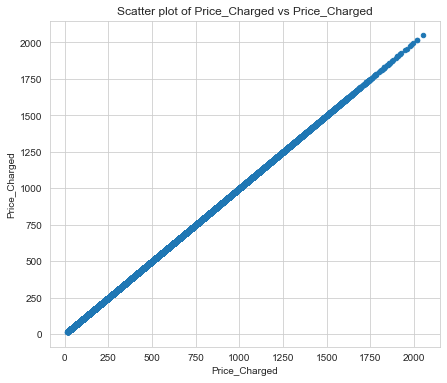

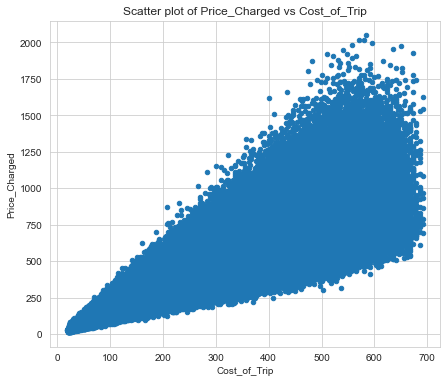

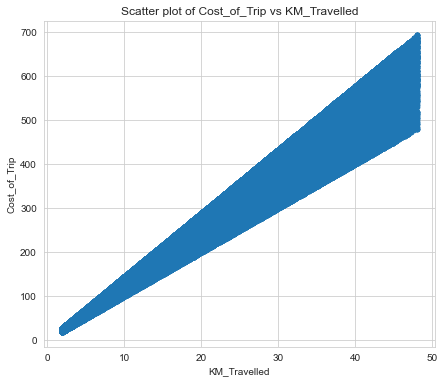

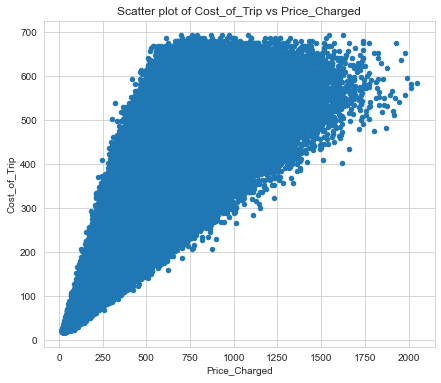

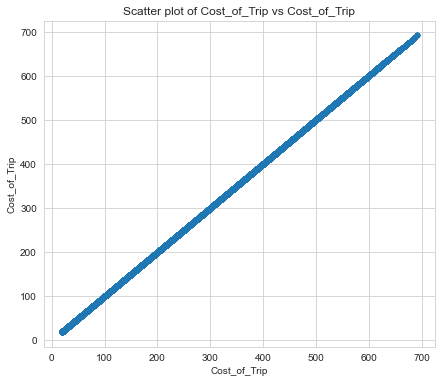

In [34]:
# creating a scatter plot for numerical columns that have strong correlation values
cols = ['KM_Travelled', 'Price_Charged', 'Cost_of_Trip']
for col_y in cols:
    def scatter_plot(df, cols, col_y):
        for col in cols:
            fig = plt.figure(figsize = (7,6))
            ax = fig.gca()
            df.plot.scatter(x = col, y = col_y, ax = ax)
            ax.set_title('Scatter plot of ' + col_y + ' vs ' + col)
            ax.set_xlabel(col)
            ax.set_ylabel(col_y)
            plt.show()
    scatter_plot(master_data, cols, col_y)

In [35]:
#quantitative analysis
#chi square test (test of independence)
#Ho:There is no relationship between city and company
#H1:There is relationship between city and company
import scipy.stats as stats #importing starts
#creating a contigency table
data_crosstab = pd.crosstab(master_data['Company'],master_data['City'],
                            margins=True, margins_name="Total")
# significance level
alpha = 0.05
# Calcualtion of Chisquare test statistics
chi_square = 0
rows = master_data['Company'].unique()
columns = master_data['City'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E
# The p-value approach
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

chisquare-score is: 39825.168294537754  and p value is: 0.0
Null Hypothesis is rejected.


In [36]:
#quantitative analysis for price charge vs company and cost of trip vs company and comapny vs profit
#creating a function for performing t-test
def company(list, DF=master_data):
    for col in list:
        print(col)
        df = master_data[['Company', col]] #forming a dataframe with the two columns
        df = df.groupby(['Company'])#grouping price charged by company
        p = df.get_group('Pink Cab')[col]#getting prices for pink cab
        group_p = p.to_numpy()
        y = df.get_group('Yellow Cab')[col]#getting prices for yellow cab
        group_y = y.to_numpy()
        #find variance for each group
#the populations have equal variances if the ratio of the larger sample variance,
#to the smaller sample variance is less than 4:1.
        print(np.var(group_p), np.var(group_y))
    #creating the hypothesis
        if col == 'Price_Charged':
            print('Ho:Yellow cab does not have a greater revenue(price charge) than the pink cab')
            print('H1: Yellow cab has greater revenue(price charge) than the pink cab')
        elif col == 'Profit':
            print('Ho:Yellow cab does not have more profits/higher profits than the pink cab')
            print('H1:Yellow cab has more profits/higher profits than the pink cab')
        else:
            print('Ho:Yellow cab does not have a higher cost of trip (expenditure) than pink cab')
            print('H1:Yellow cab has higher cost of trip (expenditure) than pink cab')
        #student t-test
        #t-test using scipy
        #perform two sample t-test with equal variances
        from scipy.stats import ttest_ind
        t_stat, p = ttest_ind(a=group_p, b=group_y, equal_var=True)
        print(f't={t_stat}, p={p}')
        if p <= 0.05:
            print('Null hypothesis is rejected')
        else:
            print('Failed to reject the Null hypothesis')
#creating list of columns
list = ['Price_Charged', 'Cost_of_Trip', 'Profit']
company(list)

Price_Charged
33122.02972214706 83166.27784471643
Ho:Yellow cab does not have a greater revenue(price charge) than the pink cab
H1: Yellow cab has greater revenue(price charge) than the pink cab
t=-140.37224404354254, p=0.0
Null hypothesis is rejected
Cost_of_Trip
18333.84937560077 26422.076629012972
Ho:Yellow cab does not have a higher cost of trip (expenditure) than pink cab
H1:Yellow cab has higher cost of trip (expenditure) than pink cab
t=-80.88610180101671, p=0.0
Null hypothesis is rejected
Profit
6020.195736256935 29523.32218542045
Ho:Yellow cab does not have more profits/higher profits than the pink cab
H1:Yellow cab has more profits/higher profits than the pink cab
t=-160.37151759478064, p=0.0
Null hypothesis is rejected


In [ ]:
#quantitative analysis for the columns age,income, price_charged and cost_of_trip vs city
#ANOVA test
cols =  ['Age', 'Income_(USD/Month)', 'Price_Charged', 'Cost_of_Trip'] #creating column list
#creating a function for the ANOVA test
def ANOVA(cols, DF=master_data):
    cities = master_data['City'].unique().tolist()#creating list of city values
    for col in cols:
        print(col)
        #creating the hypothesis
        print('Ho:' + col + ' does not differ from city to city')
        print('H1:' + col + ' differs from city to city')
        cg = []#creating an empty list for city groups
        for city in cities:
            df = master_data[[col, 'City']]
            city = df[col][df['City']==city]
            city = city.to_numpy()
            cg.append(city)
        #one-way ANOVA
        import scipy.stats as stats
        fvalue, pvalue = stats.f_oneway(cg[0], cg[1], cg[2], cg[3], cg[4], cg[5], cg[6], cg[7], 
                                        cg[8],cg[9], cg[10], cg[11], cg[12], cg[13], cg[14], 
                                        cg[15], cg[16], cg[17],cg[18])
        print(fvalue, pvalue)
        if pvalue <= 0.05:
            print('Null hypothesis is rejected')
        else:
            print('Failed to reject the Null hypothesis')
ANOVA(cols)